# CIFAR-10 Classification using CNN

## import libraries and dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import keras

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

170500096/170498071 [==============================] - 443s 3us/step


In [4]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train.shape

(50000, 32, 32, 3)

[1]


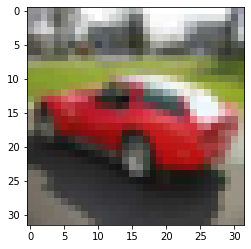

In [9]:
plt.imshow(X_train[255])
print(y_train[255])

[4]


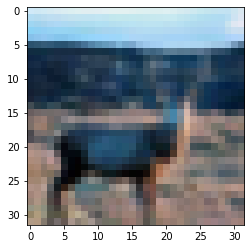

In [13]:
plt.imshow(X_train[505])
print(y_train[505])

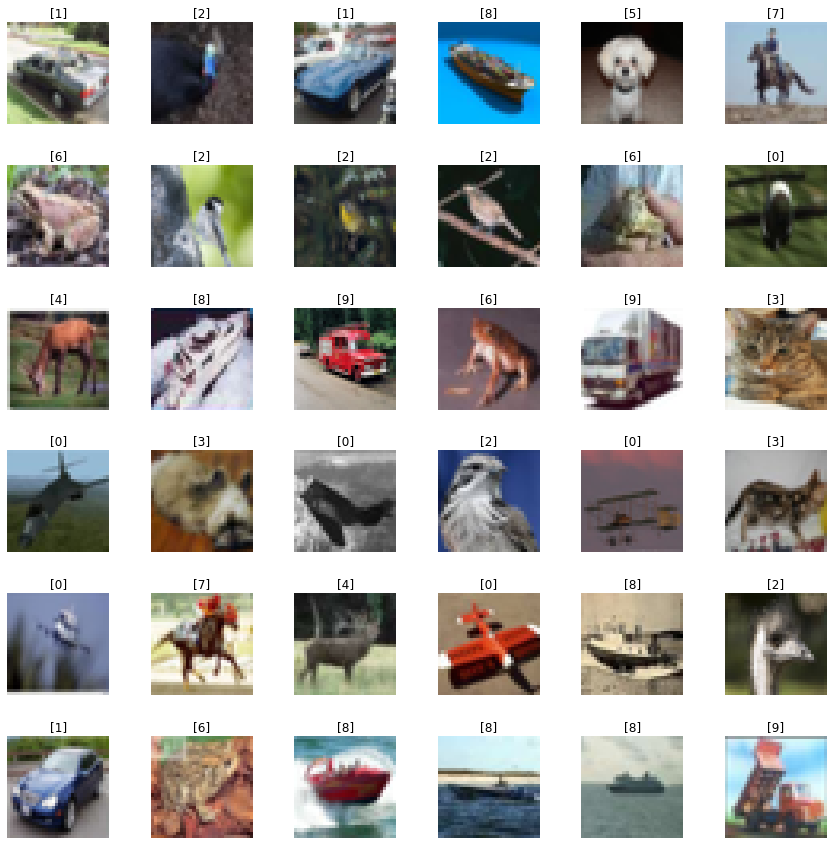

In [16]:
# Categories:

# 0 Airplanes
# 1 Cars
# 2 Birds
# 3 Cats
# 4 Deer
# 5 Dogs
# 6 Frogs
# 7 Horses
# 8 Ships
# 9 Trucks

fig, axes = plt.subplots(6,6,figsize=(15,15))
axes = axes.ravel()

for i in np.arange(36):
    index = np.random.randint(0, 50000) 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);


In [18]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
y_train = keras.utils.to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_test = keras.utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [33]:
del cnn

In [34]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(.4))

In [35]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(.3))

In [36]:
cnn.add(Flatten())
cnn.add(Dense(units=400, activation='relu'))
cnn.add(Dense(units=100, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))